In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.
Checking connectivity... done.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle

In [16]:
np.random.seed(0)

In [17]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_val, y_val = val_data['features'], val_data['labels']

In [18]:
print(y_train.shape)

(34799,)


In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [21]:
data.head(len(data))

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


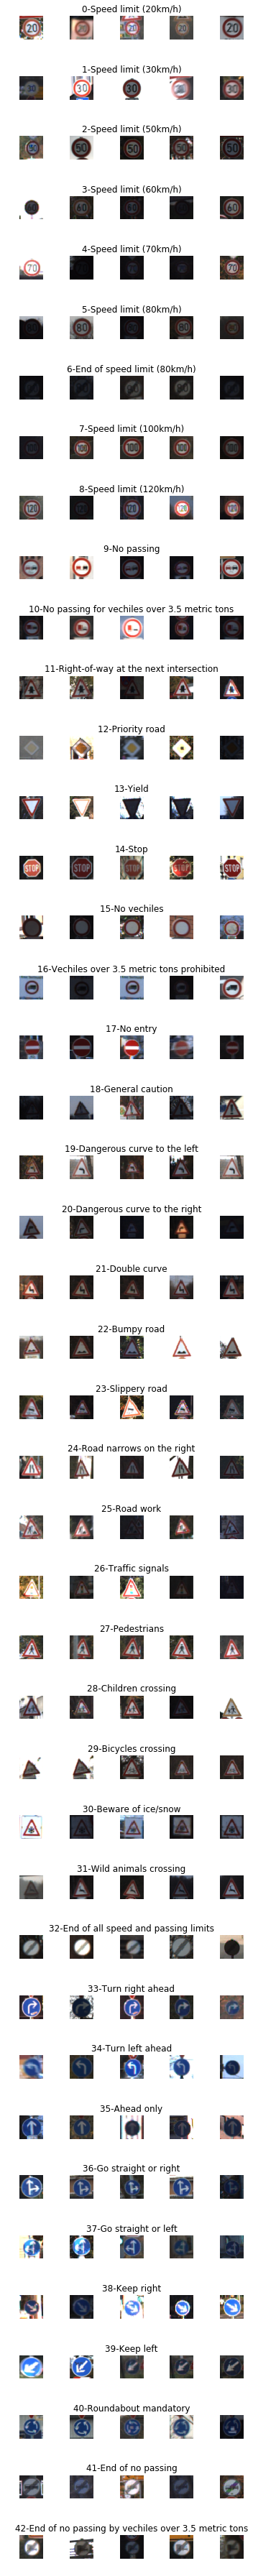

In [22]:
import random    
num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + '-' + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0,0.5,'Number of images')

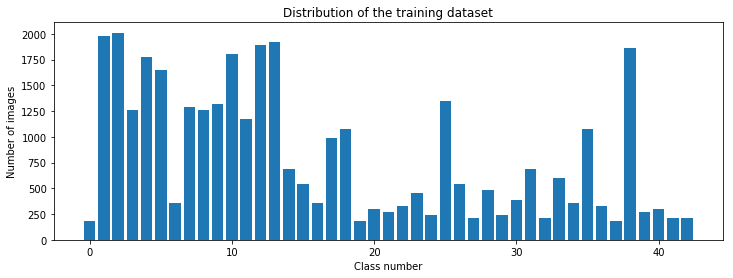

In [23]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(-0.5, 31.5, 31.5, -0.5)

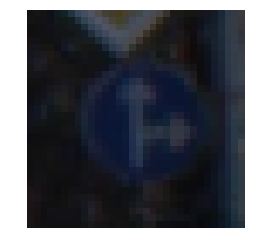

In [24]:
%matplotlib inline
import cv2
plt.imshow(X_train[1000])
plt.axis("off")

In [25]:
def preprocess(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  equ = cv2.equalizeHist(gray)
  norm = equ/255
  return norm


X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

(-0.5, 31.5, 31.5, -0.5)

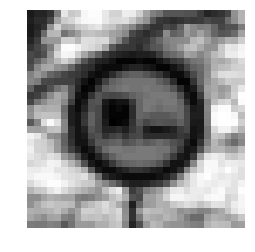

In [27]:
plt.imshow(X_train[random.randint(0, X_train.shape[0])], cmap='gray')
plt.axis("off")

In [28]:
X_train=X_train.reshape(-1, 32, 32, 1)
X_train.shape

(34799, 32, 32, 1)

In [29]:
print(X_train.shape)

(34799, 32, 32, 1)


In [30]:
X_test = X_test.reshape(-1,32,32,1)
X_val = X_val.reshape(-1,32,32,1)

In [31]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(32,32,1), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
  return model

In [32]:
model = leNet_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               270

In [33]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [34]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=400, shuffle=1)

Instructions for updating:
Use tf.cast instead.
Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 28s 794us/step - loss: 2.6545 - acc: 0.2713 - val_loss: 1.2928 - val_acc: 0.6202
Epoch 2/10
34799/34799 [==============================] - 27s 772us/step - loss: 0.9265 - acc: 0.7099 - val_loss: 0.6859 - val_acc: 0.7973
Epoch 3/10
34799/34799 [==============================] - 40s 1ms/step - loss: 0.5824 - acc: 0.8151 - val_loss: 0.6207 - val_acc: 0.8066
Epoch 4/10
34799/34799 [==============================] - 40s 1ms/step - loss: 0.4406 - acc: 0.8579 - val_loss: 0.4957 - val_acc: 0.8567
Epoch 5/10
34799/34799 [==============================] - 41s 1ms/step - loss: 0.3748 - acc: 0.8804 - val_loss: 0.4315 - val_acc: 0.8712
Epoch 6/10
34799/34799 [==============================] - 41s 1ms/step - loss: 0.3289 - acc: 0.8932 - val_loss: 0.4275 - val_acc: 0.8753
Epoch 7/10
34799/34799 [==============================] - 36s 1ms/step - loss